In [1]:
from modeling import KNN_Classifier, TokenConversion, TokenExpansion, Word2Vec
from Tokenizer import Tokenizer
from Preprocessing import PreprocessingHashtags,DeleteLowFreqHashtags
import pickle

Using TensorFlow backend.


/Users/mac/Desktop/와이빅타/신입기수프로젝트Instagram-hashtag-generator/preprocessing


In [3]:
knn = KNN_Classifier.KNN_Classifier()

In [4]:
from keras.preprocessing import image
target = image.load_img('data/img/강아지_39.jpg',target_size = (224,224))

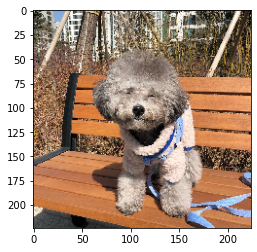

In [5]:
knn.show_target(target)

In [6]:
#코사인 유사도를 구하기 위한 디스크립터 불러오기
knn.load_pickle()

In [7]:
#target 이미지 전처리
tar = knn.img_preprocess(target)
tar = knn.model(tar)

['행복_27.jpg', '반려견_7.jpg', '강아지_76.jpg', '개스타그램_85.jpg', '고양이_8.jpg']


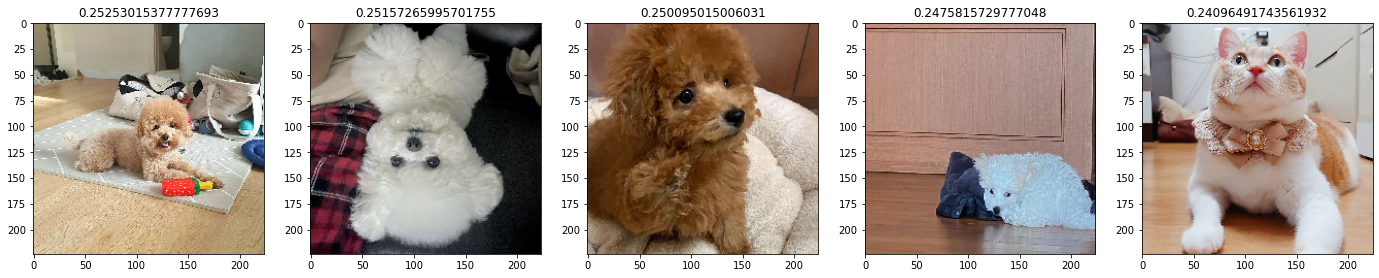

In [8]:
#유사한 이미지 보여주기
knn.show_KNN(tar,5)

In [9]:
#공통 토큰 추출
comm_token = knn.get_comm_token(3)

/anaconda3/lib/python3.7/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [10]:
comm_token

['반려견', '개', '스타그램', '멍', '멍멍', '맞팔']

In [15]:
#언어 모델 불러오기
from gensim.models.word2vec import Word2Vec
model = Word2Vec.load('modeling/model_1')

In [22]:
#토큰화된 데이터가 없는 경우 - pickle 로 저장
'''
df = PreprocessingHashtags("data/dataset.csv")
df = DeleteLowFreqHashtags(df)
tokenized = Tokenizer(df)

with open("tokenized_data.pickle","wb") as fw:
    pickle.dump(tokenized,fw)
    
'''

'\ndf = PreprocessingHashtags("data/dataset.csv")\ndf = DeleteLowFreqHashtags(df)\ntokenized = Tokenizer(df)\n\nwith open("tokenized_data.pickle","wb") as fw:\n    pickle.dump(tokenized,fw)\n    \n'

In [13]:
#토큰화된 데이터 불러오기
with open("tokenized_data.pickle","rb") as fr:
    tokenized = pickle.load(fr)

In [19]:
#토큰 전환 / 단어 임베딩에서 가까이에 있는 상위 n 개만 리스트에 저장
converted = TokenConversion.TokenConversion(model,comm_token,alpha=0.7,n=10)

In [20]:
for data in converted :
    print(data[0])


멍
환영
독
선팔
해요
좋아요
댕댕이
견
댕
강아지


In [21]:
#전환한 각 토큰들에 대하여 토큰 확장 - a 값과 임계치를 주어 무한으로 확장하지 않고, 정확한 토큰으로 확장하게 한다.
for data in converted :
    print(TokenExpansion.TagExpansion(tokenized,data[0],0.7,0.2))

['멍스타그램']
['환영맞팔']
['독스타그램']
['선팔맞팔', '선팔하면', '선팔하면맞팔']
['해요']
['좋아요반사']
['댕댕이그램']
['견스타그램']
['댕스타그램']
['강아지']
